In [116]:
import pandas as pd
import numpy as np

Time series forecasting model

In [117]:
import matplotlib.pyplot as plt

In [118]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rkamr\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [119]:
import seaborn as sns #seaborn is a data visualization library

In [120]:
pip install Scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rkamr\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [121]:
from sklearn.metrics import mean_squared_error

In [122]:
pip install xgboost  #xgboost is being used for modelling

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#xgboost'
You should consider upgrading via the 'c:\Users\rkamr\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [123]:
import xgboost as xgb  #This is being done so that this can be used to create a forecasting model

There are different types of data in Time series forecasting model (The data can be random, seasonal, exponential, linear or a combination of any of these)

The data we are using will not always fall under one bucket and we have to account to this

In [124]:
df=pd.read_csv('PJME_hourly.csv') #reading a csv file of data

In [125]:
df.head() #shows first five rows


,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [127]:
df=df.set_index('Datetime')  #We are setting datetime as index as it will be consistent in this dataset


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2+ MB


In [129]:
color_p=sns.color_palette() #color palette used for plotting
plt.style.use('fivethirtyeight')

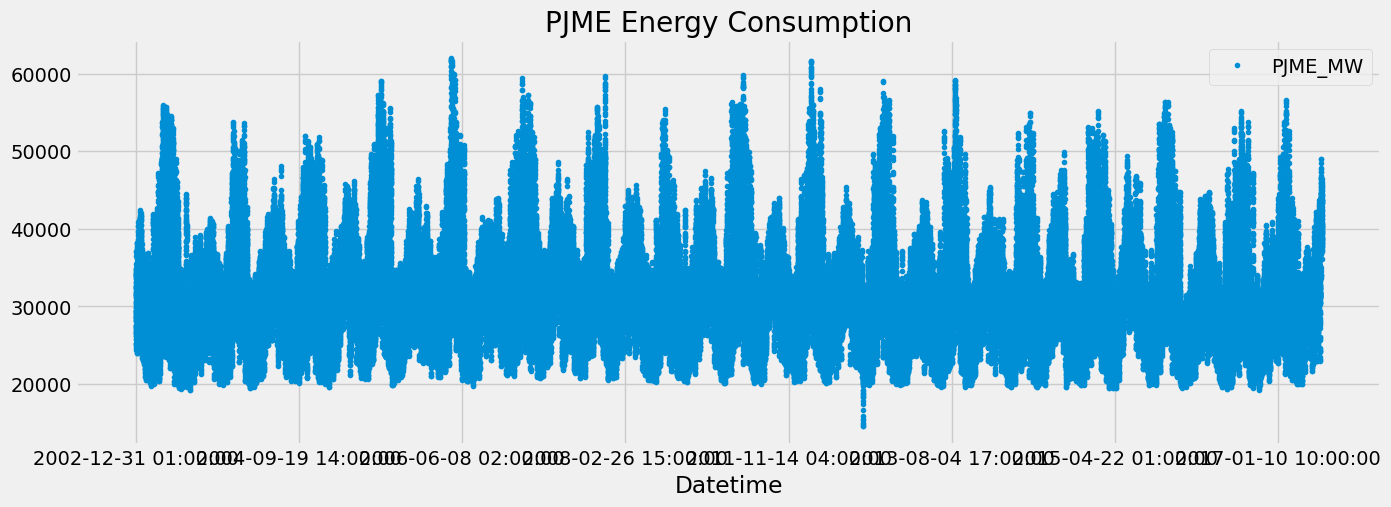

In [130]:
df.plot(style='.', figsize=(15,5), color=color_p[0], title='PJME Energy Consumption')
plt.show()

Since, we have set index as datetime, we need to check if it is actually of Datetime type. If not cast is at Datetime

In [131]:
df.index=pd.to_datetime(df.index)
len(df.index)

145366

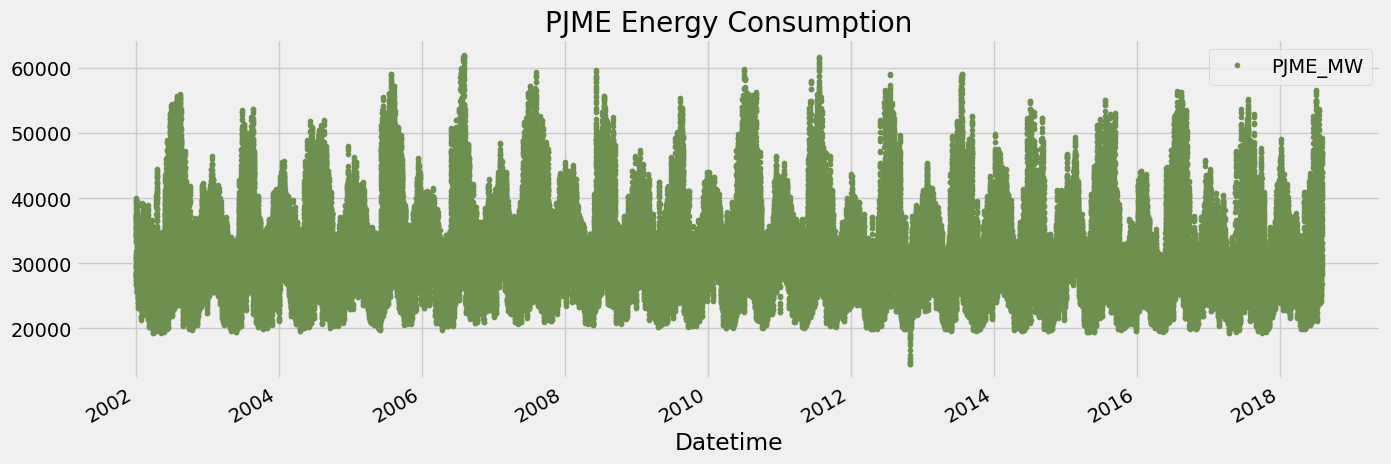

In [132]:
df.plot(style='.', figsize=(15,5), color=color_p[3], title='PJME Energy Consumption')
plt.show()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [134]:
len(df)

145366

Outlier Analysis and Removal

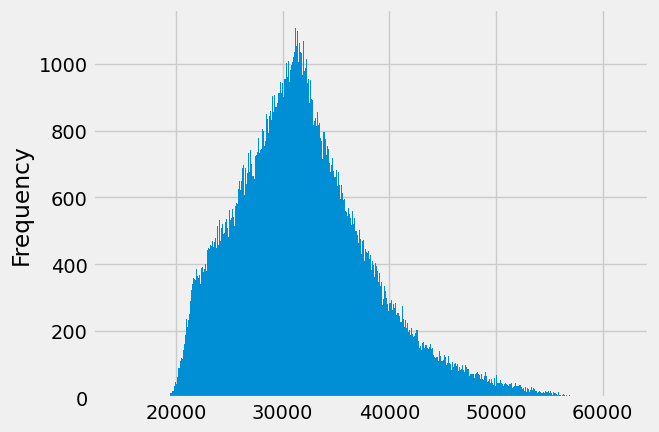

In [135]:
df['PJME_MW'].plot(kind='hist', bins=500)
plt.show()

<Axes: xlabel='Datetime'>

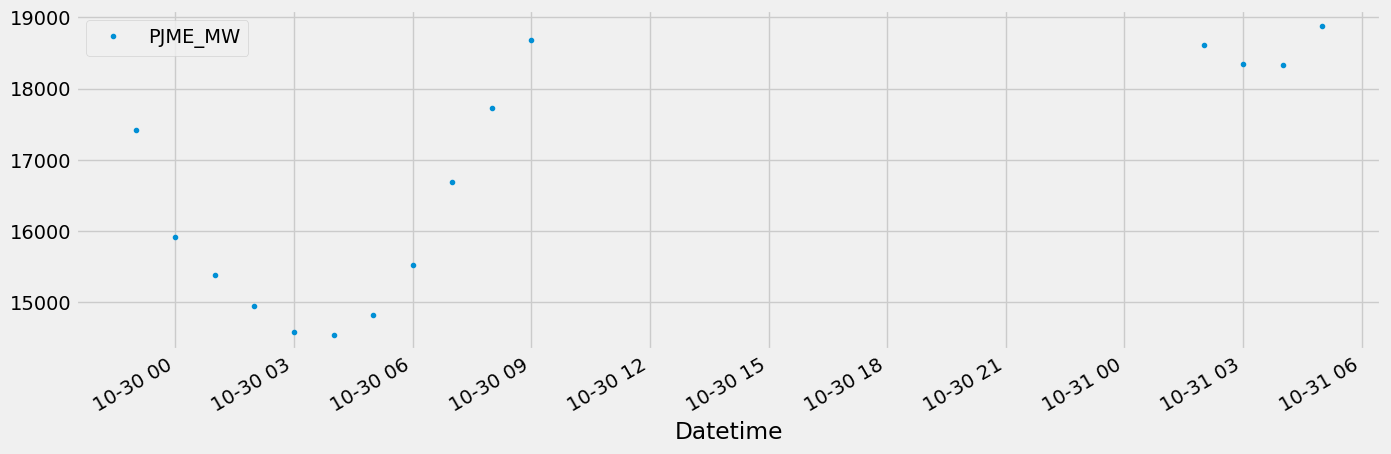

In [136]:
df.query('PJME_MW<19_000').plot(figsize=(15,5), style='.') #checking for extreme outliers

In [137]:
df = df.query('PJME_MW >19_000').copy()

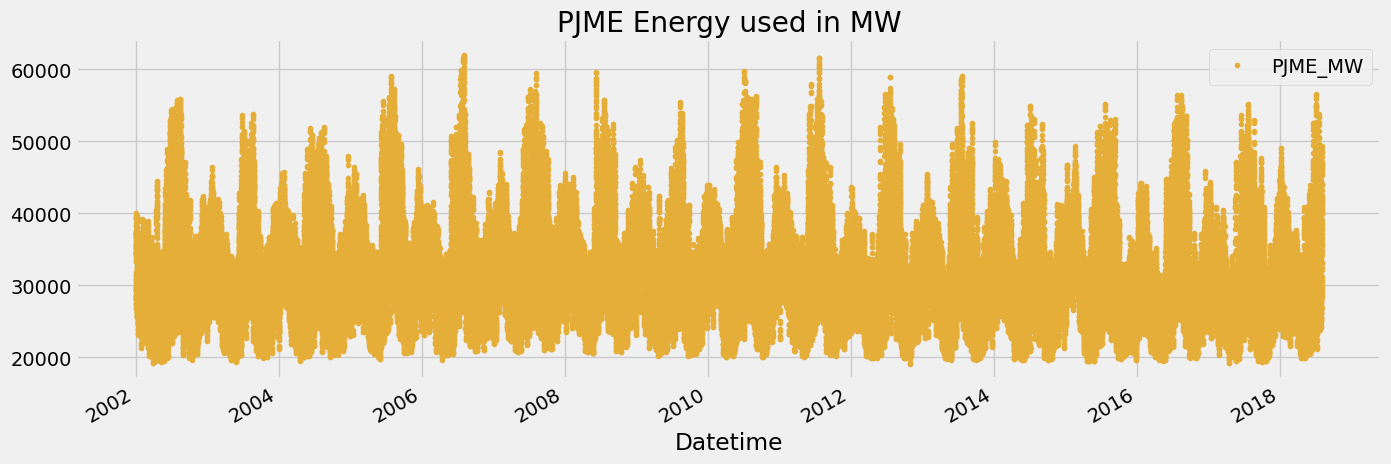

In [138]:
df.plot(style=".",figsize=(15,5), color=color_p[2],title="PJME Energy used in MW")
plt.show()

Train/Test Split

Trying to create the split the data from 2002 to 2015 as train data set and from 2015 to 2018 as test data set

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    df.index = pd.to_dataframe(df.index)
    train=df.loc[df.index < '01-01-2015']
    test=df.loc[df.index >= '01-01-2015']

    fig, ax=plt.subplots(figsize=(15,5))
    train.plot(ax=ax, label='Training Set', title='Train and Test split')
    test.plot(ax=ax, label='Test Set')
    ax.axvline(pd.Timestamp('01-01-2015'), color='black', ls='--')
    ax.legend(['Training Set', 'Test Set'])
    plt.show()

except Exception as e:
    print("An Error occured", e)

An Error occured module 'pandas' has no attribute 'to_dataframe'


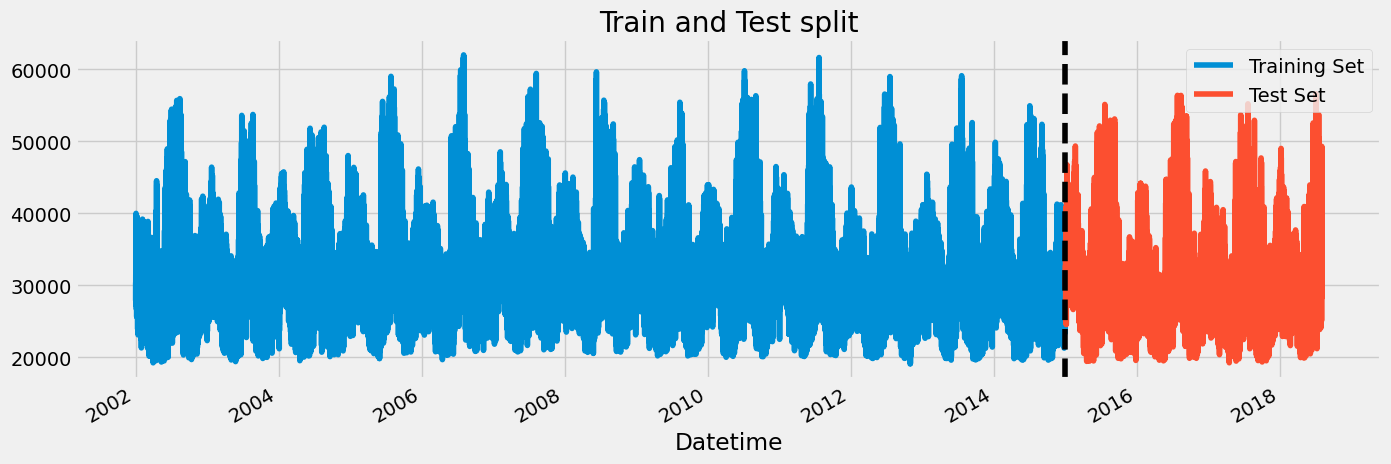

In [140]:
train=df.loc[df.index <'01-01-2015']
test=df.loc[df.index >='01-01-2015']

fig, ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set', title='Train and Test split')
test.plot(ax=ax, label='Test Set')
ax.axvline(pd.Timestamp('01-01-2015'), color='black', ls='--')

ax.legend(['Training Set', 'Test Set'])
plt.show()

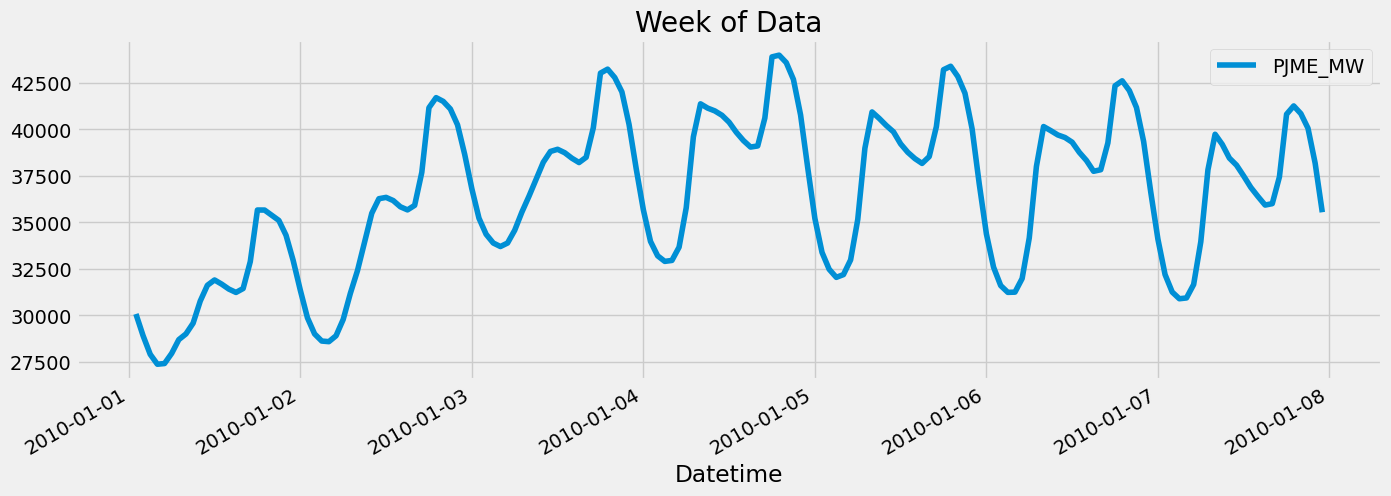

In [141]:
df.loc[(df.index>'01-01-2010')&(df.index<'01-08-2010')].plot(figsize=(15,5), title='Week of Data')
plt.show() #plots one week of data

Feature Creation

In [142]:
def create_feature(df):
    df=df.copy()
    df['hour']=df.index.hour #just the hour component is added as a new column
    df['dayofweek']=df.index.day_of_week #from documentation it is clear monday=0 and sunday=6
    df['quarter']=df.index.quarter #splitting the year into four
    df['month']=df.index.month #splitting into month
    df['year']=df.index.year
    df['dayofyear']=df.index.dayofyear
    return df

df=create_feature(df)

Visualize feature / Target Relationship:

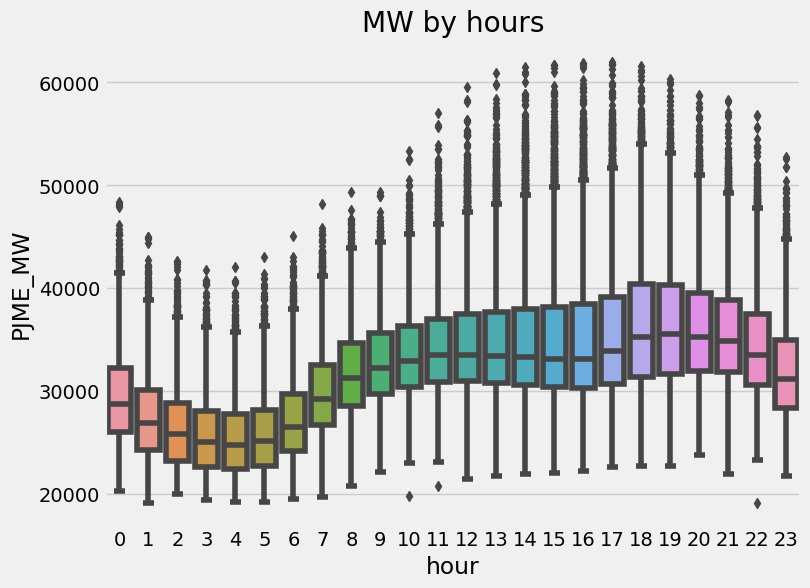

In [143]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df, x='hour', y = 'PJME_MW')
ax.set_title('MW by hours')
plt.show()
#energy level seems to be less in the morning and increase as the hour increases

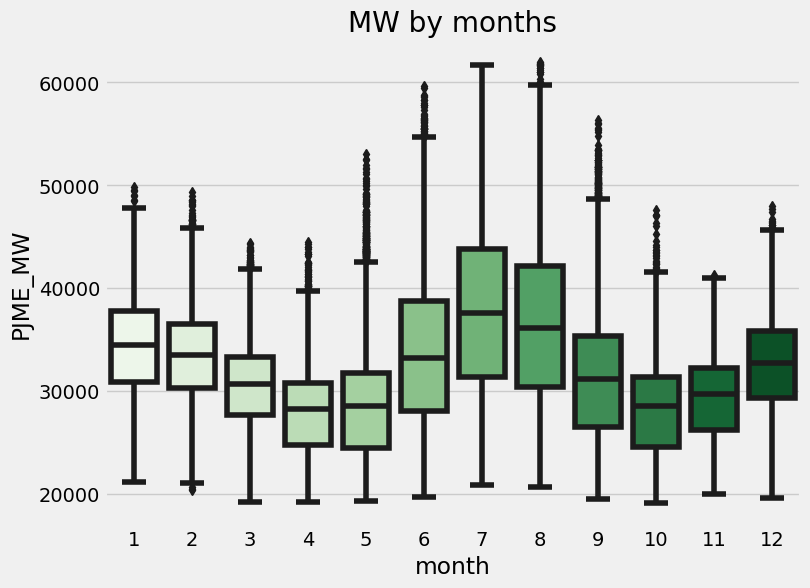

In [144]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df, x='month', y = 'PJME_MW', palette='Greens')
ax.set_title('MW by months')
plt.show()

Creating the model

In [145]:
train = create_feature(train) #we run the datasets through the create_feature function before creawtig the model
test = create_feature(test) 
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear']
TARGET = 'PJME_MW'

In [146]:
X_train = train[FEATURES]
Y_train = train[TARGET]

X_test = test[FEATURES]
Y_test = test[TARGET]

In [147]:
reg = xgb.XGBRegressor()#(n_estimators=1000#early_stopping_rounds=50, learning_rate = 0.01) #creating model using xgboost
reg.fit(X_train, Y_train, eval_set=[(X_train, Y_train),(X_test, Y_test)])#, verbose=100)

[0]	validation_0-rmse:23193.08139	validation_1-rmse:22262.40138
[1]	validation_0-rmse:16421.43601	validation_1-rmse:15522.78919
[2]	validation_0-rmse:11738.35852	validation_1-rmse:10901.54575
[3]	validation_0-rmse:8540.32895	validation_1-rmse:7809.13165
[4]	validation_0-rmse:6405.77352	validation_1-rmse:5886.29143
[5]	validation_0-rmse:5019.69721	validation_1-rmse:4713.19891
[6]	validation_0-rmse:4119.17449	validation_1-rmse:4191.49355
[7]	validation_0-rmse:3587.49082	validation_1-rmse:3961.68887
[8]	validation_0-rmse:3277.77143	validation_1-rmse:3781.70600
[9]	validation_0-rmse:3114.50367	validation_1-rmse:3744.19084
[10]	validation_0-rmse:2963.53834	validation_1-rmse:3753.66730
[11]	validation_0-rmse:2898.69408	validation_1-rmse:3760.96367
[12]	validation_0-rmse:2812.93206	validation_1-rmse:3802.68472
[13]	validation_0-rmse:2783.74023	validation_1-rmse:3801.39145
[14]	validation_0-rmse:2724.14605	validation_1-rmse:3814.73050
[15]	validation_0-rmse:2701.53003	validation_1-rmse:3832.80

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Feature Importance:

In [148]:
fi = pd.DataFrame(reg.feature_importances_, index=reg.feature_names_in_,
            columns=["importance"]) #importance of features with index as feature names

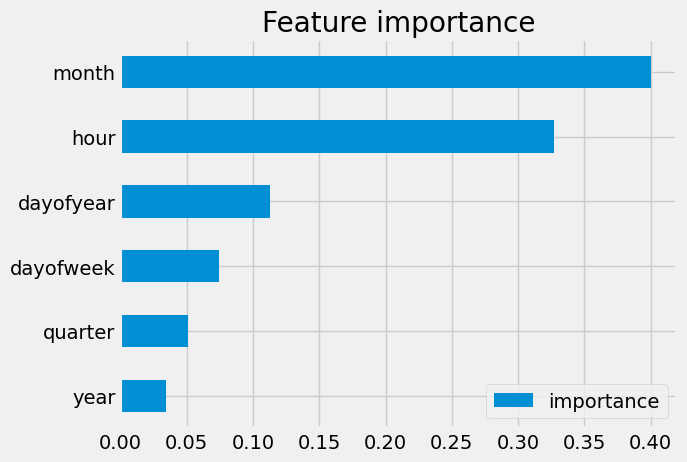

In [149]:
fi.sort_values('importance').plot(kind='barh', title='Feature importance') #plotting according to importance
plt.show()

Forecast on test:

In [150]:
test['prediction'] = reg.predict(X_test)
df=df.merge(test['prediction'],how="left",left_index=True, right_index=True)
df

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,prediction
Datetime,,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,NaN
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,NaN
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,NaN
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,NaN
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,NaN
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,37984.175781
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,36884.730469
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,35200.136719


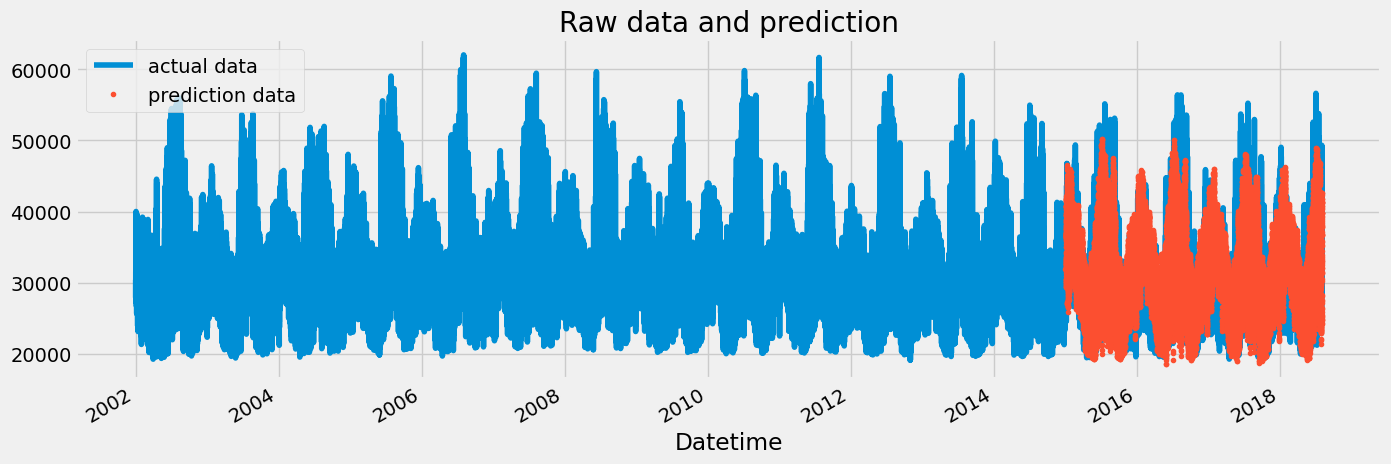

In [151]:
ax = df['PJME_MW'].plot(figsize=(15,5)) #comaparing raw data and prediction on years
df['prediction'].plot(ax=ax, style='.')
plt.legend(['actual data','prediction data'])
ax.set_title("Raw data and prediction")
plt.show()

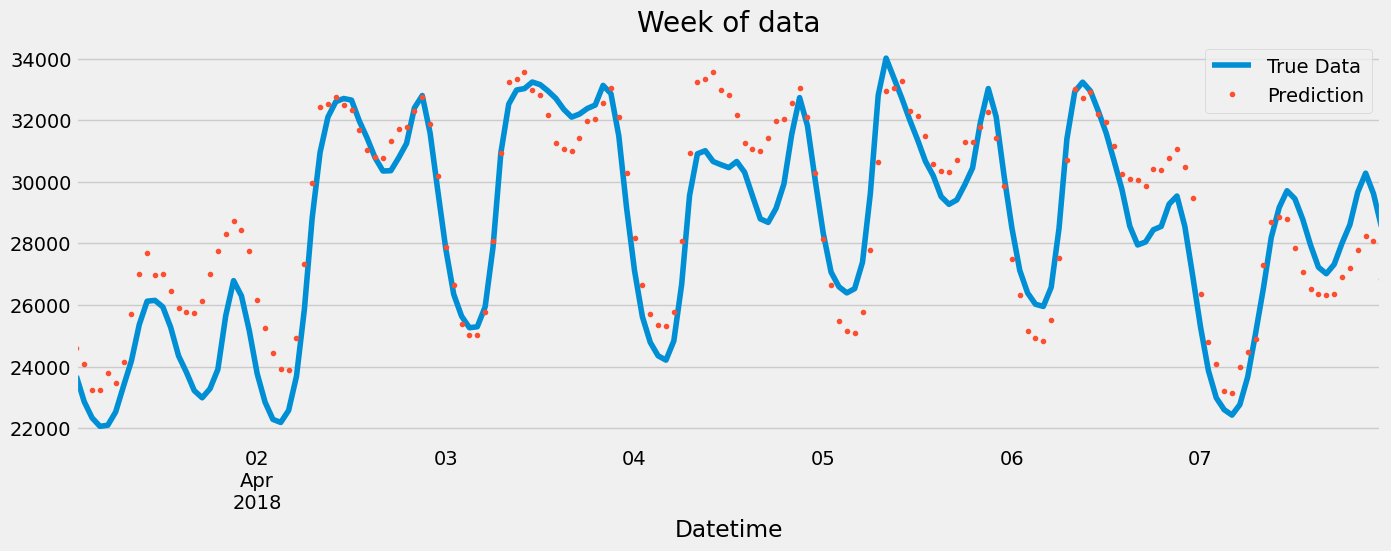

In [152]:
ax = df[(df.index > '04-01-2018') & (df.index <'04-08-2018')]['PJME_MW'].plot(figsize=(15,5), title='Week of data')
df.loc[(df.index > '04-01-2018') & (df.index <'04-08-2018')]['prediction'].plot(style='.')
plt.legend(['True Data','Prediction'])
plt.show()
#comaparing raw data and prediction on a week of data.

This prediction is not very accurate, fine tuning of parameters can be done to make it better

In [153]:
score = np.sqrt(mean_squared_error(test['PJME_MW'],test['prediction']))
print(f'RMSE score on Test Set : {score:0.2f}')

RMSE score on Test Set : 4253.95


Calculating Error:

In [154]:
test['error'] = np.abs(test[TARGET] - test['prediction'])

Looking at the best and best predicted days:

In [155]:
test['date']=test.index.date

Best predicted days:

In [156]:
test.groupby(['date'])['error'].mean().sort_values()

date
2015-09-22      270.381429
2017-05-07      290.408610
2016-04-29      296.997965
2017-05-06      305.242594
2017-11-13      322.953939
                  ...     
2016-07-25    11891.167806
2016-09-10    12383.547201
2016-08-12    13491.777588
2016-08-13    18294.525635
2016-08-14    18314.097656
Name: error, Length: 1311, dtype: float64

Sort according to worst days:

In [157]:
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(5)

date
2016-08-14    18314.097656
2016-08-13    18294.525635
2016-08-12    13491.777588
2016-09-10    12383.547201
2016-07-25    11891.167806
Name: error, dtype: float64

Time Seris Cross Validation:
- This is used to create a more robust version

In [158]:
from sklearn.model_selection import TimeSeriesSplit 
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap= 24) #gap is the time between when train set ends and test set starts
df = df.sort_index()

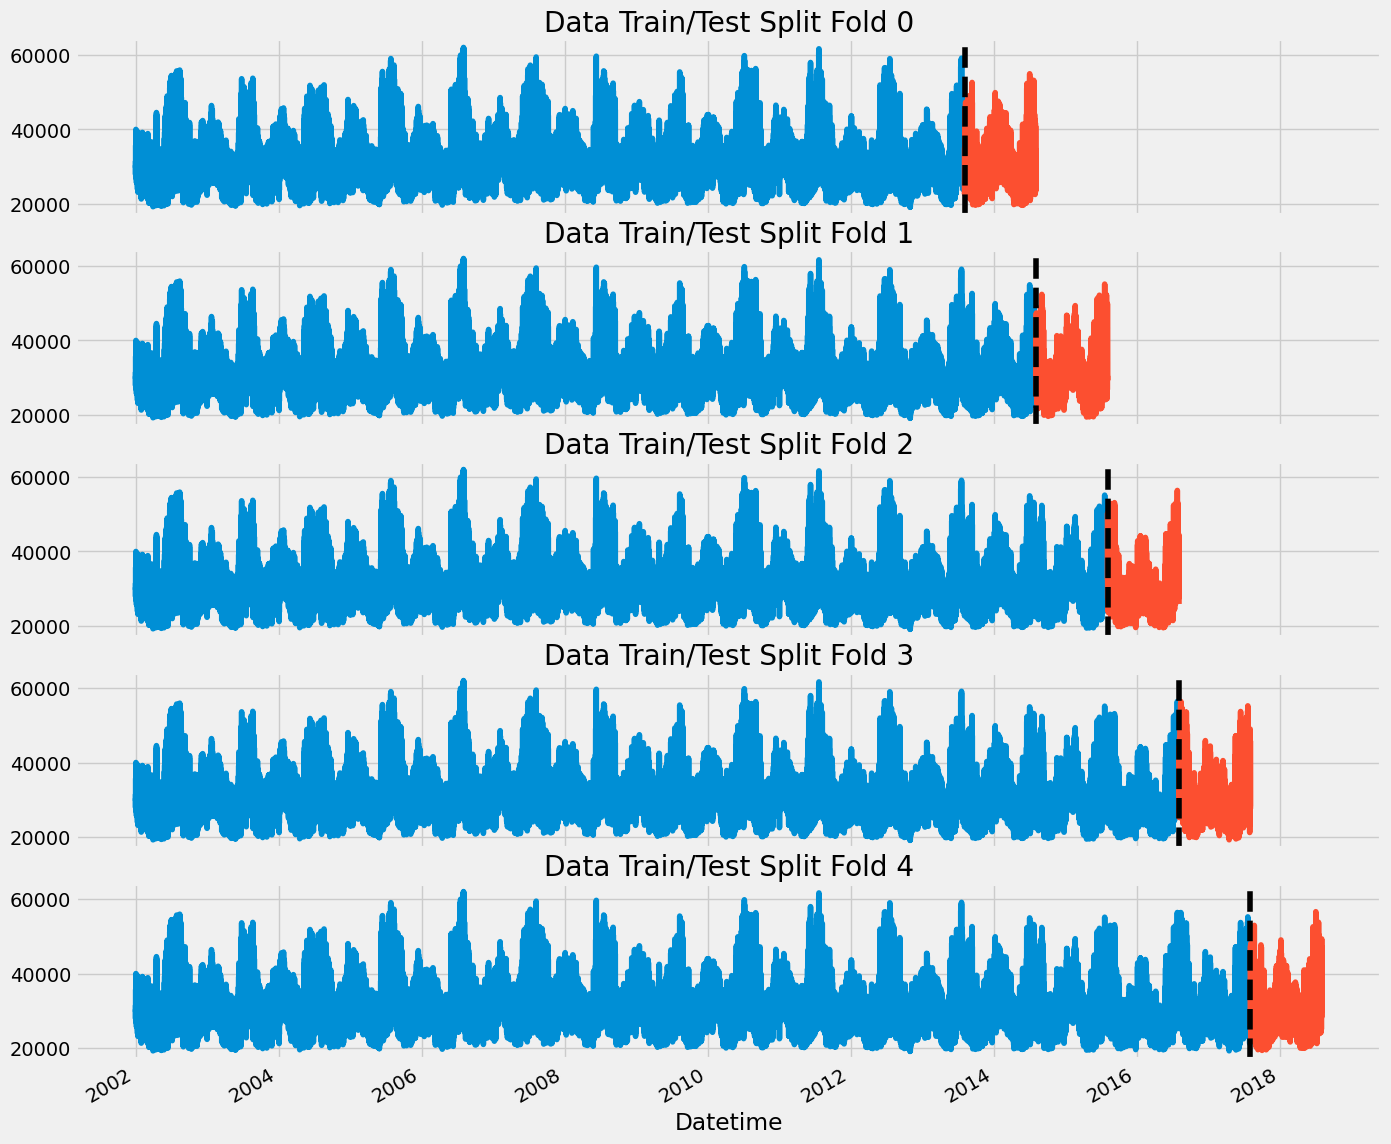

In [159]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['PJME_MW'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['PJME_MW'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

Forecasting Horizon:
- Length of time into the future for which the forecasts are to be prepared. They can range from short-range horizon (like less than 3 months) to long-time horizons (like more than 2 years)

In [160]:
def create_features(df): #time series features
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear']=df.index.dayofyear
    df['dayofmonth'] = df.index.day
    
    return df
df = create_features(df)

Lag Features:
-To look back into x days in the past and to use the target value of that x days as a new feature to feed into the model

In [161]:
def add_lags(df): #create a dictionary for mapping lag feature into the dataframe
    target_map = df['PJME_MW'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [162]:
df=add_lags(df)

Train using Cross Validation:

In [163]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*365, gap=24)
df = df.sort_index()

fold = 0
preds = []
scores = []

for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'lag1', 'lag2', 'lag3']
    TARGET = 'PJME_MW'

    X_train = train[FEATURES]
    Y_train = train[TARGET]
    X_test = test[FEATURES]
    Y_test = test[TARGET]
    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',n_estimators=1000,
                           early_stopping_rounds=50,objective='reg:linear',
                           max_depth=3,learning_rate=0.01)
    reg.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_test,Y_test,)],verbose=100)
    Y_pred = reg.predict(X_test)
    preds.append(Y_pred)
    score = np.sqrt(mean_squared_error(Y_test,Y_pred))
    scores.append(score)

[14:01:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32732.30381	validation_1-rmse:31956.18912
[100]	validation_0-rmse:12532.08851	validation_1-rmse:11907.28743
[200]	validation_0-rmse:5743.63141	validation_1-rmse:5355.87526
[300]	validation_0-rmse:3866.81923	validation_1-rmse:3891.07137
[400]	validation_0-rmse:3429.97908	validation_1-rmse:3752.52827
[455]	validation_0-rmse:3349.98890	validation_1-rmse:3760.34829
[14:01:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32671.76435	validation_1-rmse:32142.13257
[100]	validation_0-rmse:12513.14073	validation_1-rmse:12225.51268
[200]	validation_0-rms

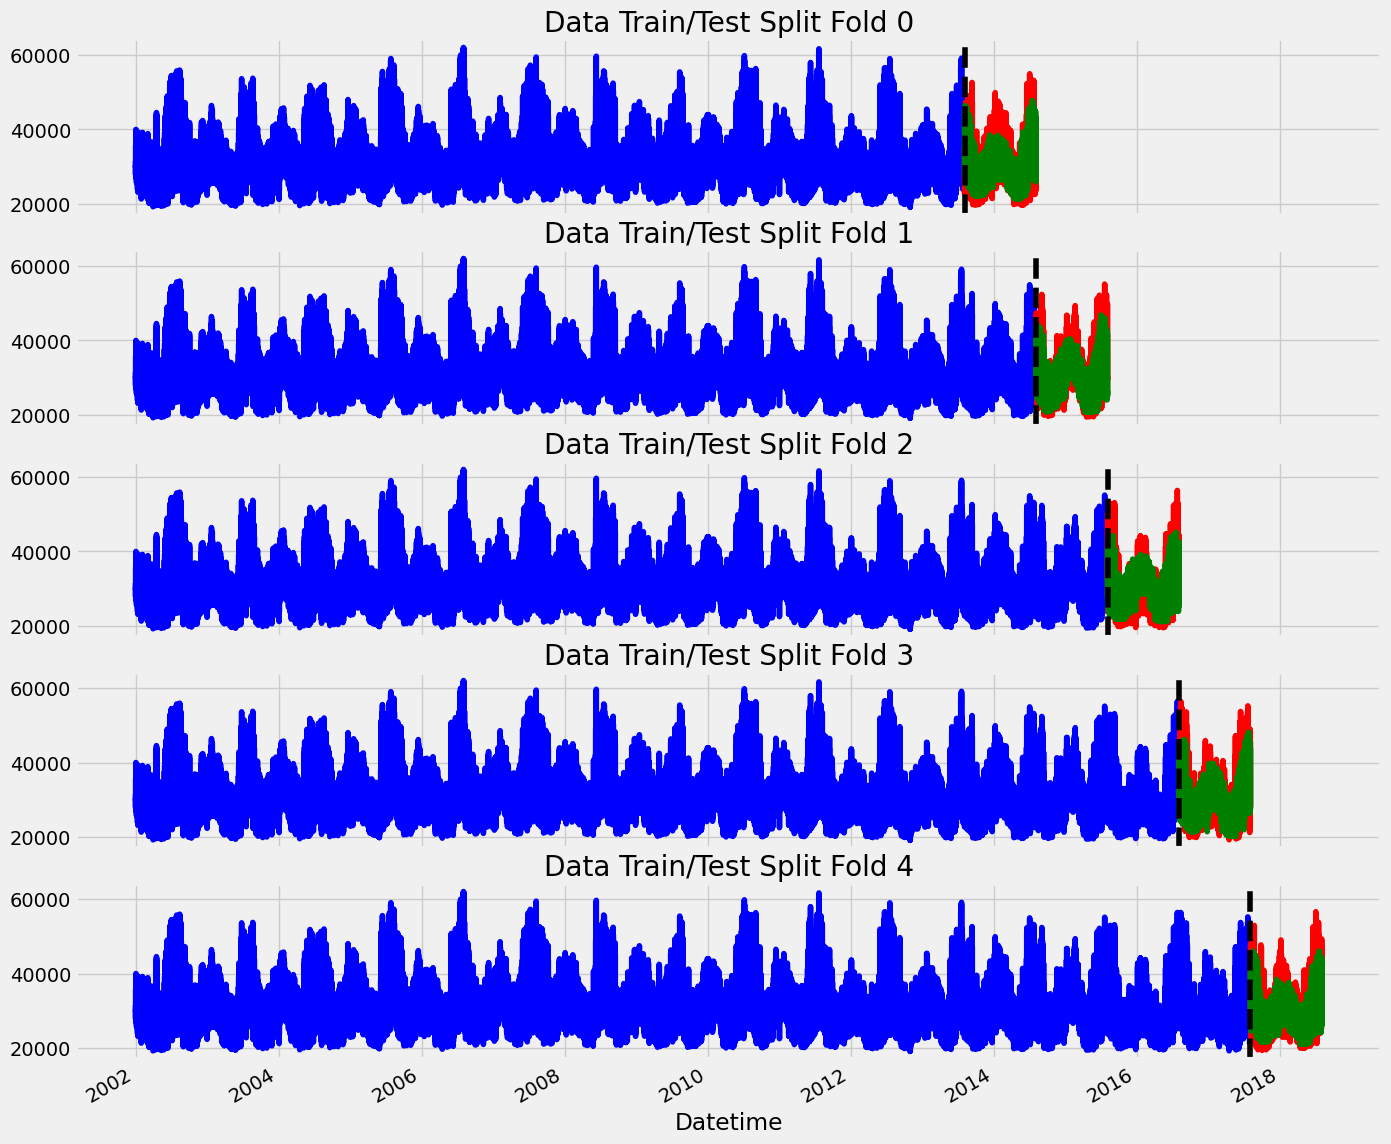

In [164]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['PJME_MW'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}',
                          color='blue')
    test['PJME_MW'].plot(ax=axs[fold],
                         label='Test Set',color='red')
    pred =  pd.DataFrame(index=test.index)
    pred["PJME_MW"] = preds[fold]
    pred['PJME_MW'].plot(ax=axs[fold],
                         label='prediction Set',color='green')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [165]:
print(f'Score across folds {np.mean(scores):0.3f}')
print(f'Fold scores:{scores}')

Score across folds 3751.235
Fold scores:[3752.0429223295546, 3443.7795983482683, 3472.8598773882027, 4093.6135720175807, 3993.8801185144675]


Predicting the Future:
This requires:
- Retraining of all data
- An empty dataframe for future date ranges
- Running those dates through feature and lag creation

In [166]:
df = create_features(df)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year',
            'lag1','lag2','lag3']
TARGET = 'PJME_MW'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor()#base_score=0.5,booster='gbtree',    
                       #n_estimators=500,objective='reg:linear',
                       #max_depth=3,learning_rate=0.01)
reg.fit(X_all, y_all,eval_set=[(X_all, y_all)],verbose=100)

[0]	validation_0-rmse:23062.58652
[99]	validation_0-rmse:2029.03761


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [167]:
#Creating future data frame
future = pd.date_range('2018-08-03','2019-08-01', freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [168]:
future_w_features = df_and_future[df_and_future['isFuture']].copy()
future_w_features

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,prediction,dayofmonth,lag1,lag2,lag3,isFuture
2018-08-03 00:00:00,NaN,0,4,3,8,2018,215,NaN,3,33539.0,32094.0,31695.0,True
2018-08-03 01:00:00,NaN,1,4,3,8,2018,215,NaN,3,30781.0,29503.0,29128.0,True
2018-08-03 02:00:00,NaN,2,4,3,8,2018,215,NaN,3,29015.0,27712.0,27373.0,True
2018-08-03 03:00:00,NaN,3,4,3,8,2018,215,NaN,3,27884.0,26535.0,26233.0,True
2018-08-03 04:00:00,NaN,4,4,3,8,2018,215,NaN,3,27223.0,25870.0,25643.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31 20:00:00,NaN,20,2,3,7,2019,212,NaN,31,46912.0,39352.0,40243.0,True
2019-07-31 21:00:00,NaN,21,2,3,7,2019,212,NaN,31,45985.0,38699.0,39183.0,True
2019-07-31 22:00:00,NaN,22,2,3,7,2019,212,NaN,31,44094.0,37346.0,37759.0,True
2019-07-31 23:00:00,NaN,23,2,3,7,2019,212,NaN,31,40666.0,34555.0,34641.0,True


Predict the Future:

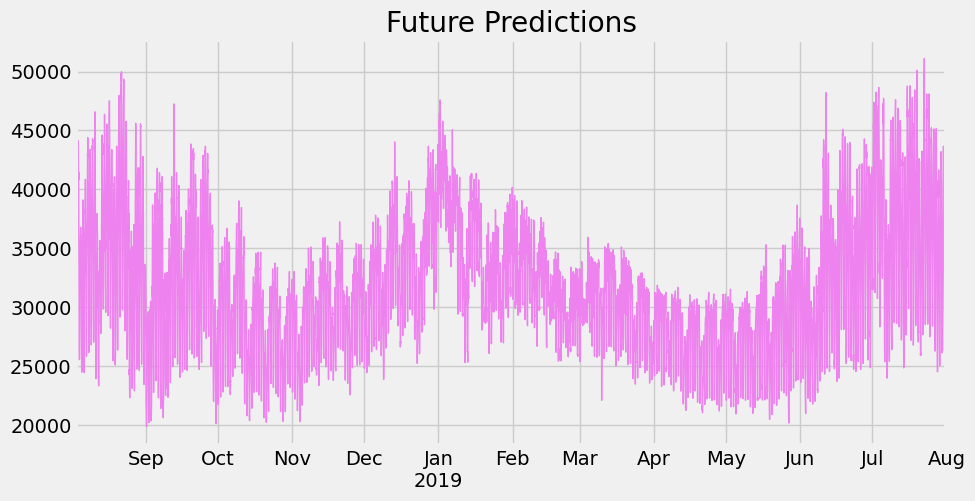

In [169]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])
future_w_features['pred'].plot(figsize=(10, 5),color="violet",
                               ms=1,lw=1,title='Future Predictions')
plt.show()

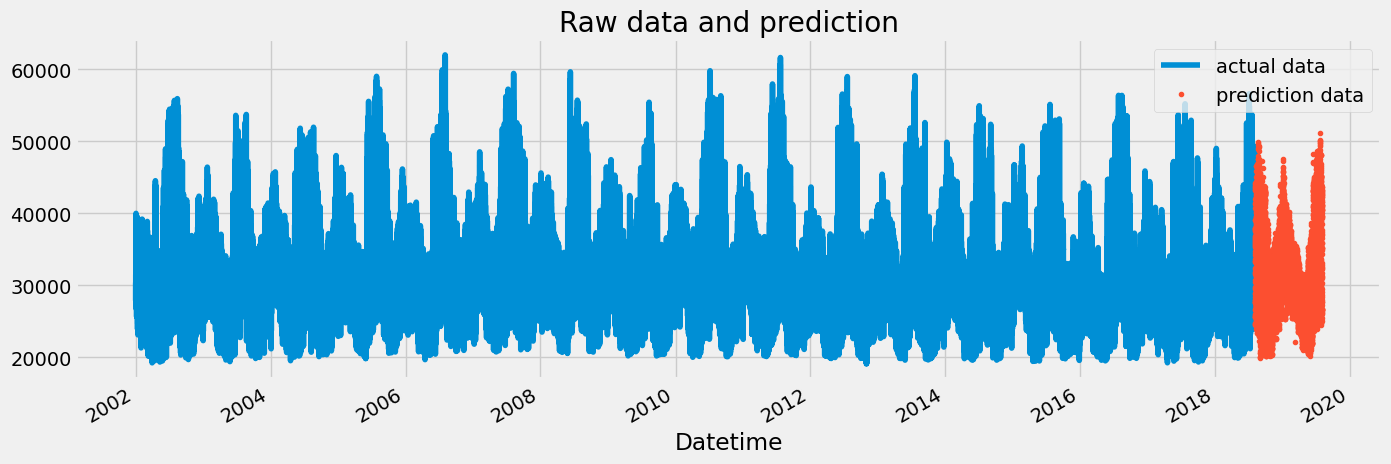

In [170]:
ax = df['PJME_MW'].plot(figsize=(15,5))
future_w_features['pred'].plot(ax=ax, style='.')
plt.legend(['actual data','prediction data'])
ax.set_title("Raw data and prediction")
plt.show()